In [2]:
#standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#Getting data to be used in machine learning 
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()
x = heart_disease.drop("target",axis=1)
y = heart_disease['target']

In [4]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [6]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
x = car_sales.drop('Price',axis=1)
y = car_sales['Price']
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
x_train

,Make,Colour,Odometer (KM),Doors
648,Honda,White,40134,4
400,Toyota,Red,157432,4
655,Toyota,White,72725,4
626,Nissan,White,235952,4
181,Nissan,White,118470,3
...,...,...,...,...
46,Toyota,White,100938,4
890,Toyota,Black,144944,4
821,Nissan,Red,124112,4
776,Toyota,Blue,61337,4


In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
# model.fit(x_train,y_train)
# score = model.score(x_test,y_test)
# score

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(x)
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [9]:
#fir the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [10]:
model.score(x_test,y_test)

0.3235867221569877

# Handling missing values

In [11]:
#import car_sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [14]:
#convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()

#### Fill missing data with pandas

In [15]:
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)
car_sales_missing.dropna(inplace=True)
x=car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']
categorical_features = ['Make','Colour','Doors']
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
car_sales_missing['Doors'].value_counts()

4.0    815
5.0     71
3.0     64
Name: Doors, dtype: int64

In [17]:
model.score(x_test,y_test)

0.9999491016126744

In [18]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [19]:
len(car_sales_missing)

950

 ## Fill missing values with scikit learn

In [20]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
# drop rows with missing Price value
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [21]:
# split data into x and y
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [22]:
# Filling missing data with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
#fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')
#define columns
cat_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer, (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])
# transform the data
filled_x = imputer.fit_transform(x)
car_sales_filled = pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
categorical_features = ['Make','Colour','Doors']
transformer= ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.2595811556864356

In [24]:
np.random.seed(42)
for i in range(0,500,5):
    print(f"Trying model with {i} estimators")
    if(i >1):
        model = RandomForestRegressor(n_estimators=i-1)
        model.fit(x_train,y_train)
        print(f"Model Score on {i} estimators is {model.score(x_test,y_test)*100:.2f}")
    print('*****************************************')

Trying model with 0 estimators
*****************************************
Trying model with 5 estimators
Model Score on 5 estimators is 13.52
*****************************************
Trying model with 10 estimators
Model Score on 10 estimators is 19.13
*****************************************
Trying model with 15 estimators
Model Score on 15 estimators is 26.58
*****************************************
Trying model with 20 estimators
Model Score on 20 estimators is 23.46
*****************************************
Trying model with 25 estimators
Model Score on 25 estimators is 24.32
*****************************************
Trying model with 30 estimators
Model Score on 30 estimators is 21.30
*****************************************
Trying model with 35 estimators
Model Score on 35 estimators is 22.55
*****************************************
Trying model with 40 estimators
Model Score on 40 estimators is 26.03
*****************************************
Trying model with 45 estimators
M

Model Score on 365 estimators is 26.58
*****************************************
Trying model with 370 estimators
Model Score on 370 estimators is 25.77
*****************************************
Trying model with 375 estimators
Model Score on 375 estimators is 25.53
*****************************************
Trying model with 380 estimators
Model Score on 380 estimators is 26.39
*****************************************
Trying model with 385 estimators
Model Score on 385 estimators is 25.80
*****************************************
Trying model with 390 estimators
Model Score on 390 estimators is 25.98
*****************************************
Trying model with 395 estimators
Model Score on 395 estimators is 26.99
*****************************************
Trying model with 400 estimators
Model Score on 400 estimators is 26.68
*****************************************
Trying model with 405 estimators
Model Score on 405 estimators is 26.64
*****************************************
Trying 

## Scikit estimators

* Classification -predicting whether a sample is one thing or another
* Regressuib - Predicting a number

## Picking a machine learning model for a regression problem

In [25]:
# get datasets from boston
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
#the values we will be trying to predict
boston_df['target'] = pd.Series(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [26]:
# number of sample
len(boston_df)

506

In [27]:
#make prediction using Ridge regression model
from sklearn.linear_model import Ridge
np.random.seed(100)
x = boston_df.drop('target',axis=1)
y=boston_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = Ridge()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.7500978146031212

In [28]:
# Try above with Random forest
from sklearn.ensemble import RandomForestRegressor
np.random.seed(100)
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.890491084149684

# Choosing estimators for a classification problem

In [29]:
heart_disease = pd.read_csv('data/heart-disease.csv')
# from scikit-learn Ml map, the model that fits our data is svm
from sklearn import svm
np.random.seed(100)
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
classiffier = svm.LinearSVC(max_iter=99000,dual=False)
classiffier.fit(x_train,y_train)
classiffier.score(x_test,y_test)


0.8360655737704918

In [30]:
# svm is still not working well for me, I will now try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


0.8688524590163934

# Fitting model to a prediction and use it to make predictions

### Fittting the model
Different names for:
* `x` = features, features variables,data
* `y` =labels,targtes,targte variables

In [31]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
heart_disease = pd.read_csv('data/heart-disease.csv')
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
#fitting the model to data
clf.fit(x_train,y_train);


# Making predictions
There are two ways of making a prediction
1.  `predict()`
2. `predict_proba()`

In [32]:
# making predictions using 'predict()'
clf.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [33]:
#compare predictions to with the true values to evaluate the model
y_preds = clf.predict(x_test)
# There are three ways of getting the accuracy score of a model
np.mean(y_test==y_preds)
# The second way
clf.score(x_test,y_test)
# the third way 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8852459016393442

In [34]:
#make prediction using predict_proba
# the predict_proba() return probability of a classification model
# we want to check the probability of a patient having heart disease or not, the firsr value in array 
# is probability of being false while the second is probability of being true
clf.predict_proba(x_test[:5])

array([[0.17, 0.83],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.39, 0.61]])

## using predict with regression model

In [35]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(100)
x = boston_df.drop('target',axis=1)
y = boston_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestRegressor()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
# compare the predictions to the truth and check accuracy score
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)
# this return the average our predictions are from the real result

2.3711274509803917

# Evaluating a machine learning model
There ways to evaluate Scikit-learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

## Evaluating a model with score method

In [36]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
heart_disease = pd.read_csv('data/heart-disease.csv')
# let's try and shuffle data to see if well get different results
from sklearn.utils import shuffle
heart_disease= shuffle(heart_disease)
#then we reset the index using pandas
heart_disease.reset_index(inplace=True,drop=True)
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
score

0.819672131147541

## Evaluating a model using `scoring` method

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#we will be using the clf,x and y of heart disease on previous test
np.random.seed(100)
heart_disease = pd.read_csv('data/heart-disease.csv')
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
cross_val_score(model,x,y,cv=5)

array([0.83606557, 0.90163934, 0.81967213, 0.78333333, 0.75      ])

In [38]:
# Lets compare our data
model.fit(x_train,y_train)
model_single_score = model.score(x_test,y_test)
model_cross_val_score = np.mean(cross_val_score(model,x,y,cv=10))
model_single_score,model_cross_val_score

(0.8688524590163934, 0.8148387096774193)

# Classification model evaluation metrics
1. Accuracy
2. Area under  Curve
3. Confusion Matrix
4. Classification Report

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']
## test split train isnt necessary as we'll used cross_val_score on this
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestClassifier()
cross_val_score(model,x,y,cv=5)

array([0.83606557, 0.90163934, 0.81967213, 0.78333333, 0.75      ])

## Area under the receiver operatign characteristic curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve
ROC curve are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

In [149]:
from sklearn.metrics import roc_curve
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# make prediction with probabilities
np.random.seed()
clf = RandomForestClassifier(n_estimators=4)
clf.fit(x_train,y_train)
y_probs = clf.predict_proba(x_test)
y_probs_positive = y_probs[:,1]#get only the second  column of y probs...which are positive probs
clf.score(x_test,y_test)

0.7868852459016393

In [130]:
#calculate fpr, tpr and thresholds
# fpr = false positive rate; tpr= true positive rate
fpr,tpr,threshold = roc_curve(y_test,y_probs_positive)

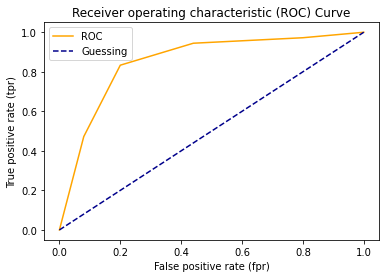

In [131]:
# function for plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)
    """
    # plot ROC curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    #customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [134]:
from sklearn.metrics import roc_auc_score
# this culculates the area under curve of the graph above
roc_auc_score(y_test,y_probs_positive)

0.8527777777777777

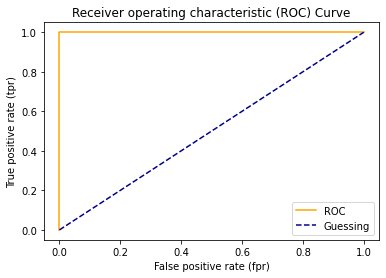

In [136]:
# plot perfect ROC curve and AUC
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [137]:
# from the above diagram, we can note that a perfect AUC score is:
roc_auc_score(y_test,y_test)
# which is 1.0

1.0

Now lets talk about 
## confusion matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict
In essence, giving you an idea of what the model is getting confused


In [150]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[30,  6],
       [ 7, 18]])

In [151]:
# lets visualize the above matrix using pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,30,6
1,7,18


In [153]:
# another way of installing conda package from jupyter notebook itself
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /home/moringa/Desktop/ml-projects/project1/env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


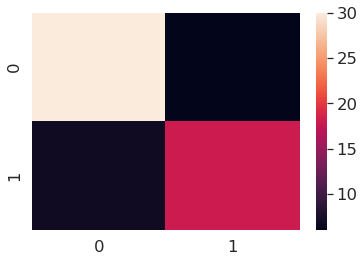

In [154]:
# make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
# set the font scale
sns.set(font_scale=1.5)
# create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
# plot it usinf seaborn
sns.heatmap(conf_mat);

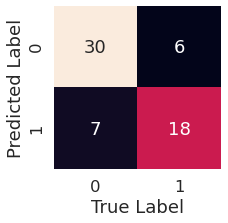

In [157]:
# create a function for confusion matrix using seaborns heatmap
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, #Annotate the boxes with conf_mat info
                     cbar=False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");
plot_conf_mat(conf_mat)

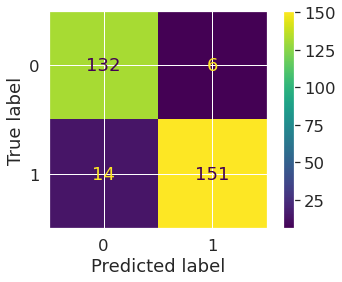

In [159]:
# We can do the same thing above using sklearns on heatmap plot
from sklearn.metrics import plot_confusion_matrix
np.random.seed(100)
plot_confusion_matrix(clf,x,y);

## classification report

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.75      0.72      0.73        25

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [163]:
# scenarios where precision and recall become valuable
# we're creating a scenario where we want to know the person who is sick in a group of 10000
disease_true = np.zeros(10000)
disease_true[0]=1 # one positive case
disease_preds = np.zeros(10000) #model predicts every case as zero
pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/home/moringa/Desktop/ml-projects/project1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics
* Accuracy is a good measure to start with if all classes are balanced (eg same amount of samples which are labelled 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced
* if false positive predictions are worse than false negatives, aim for high precision
* if false negative predictions are worse than false positives, aim for higher recall
* **F1-score** is a combination of precision and recall

# Regression model evaluation metrics

1. R^2 (pronounced as r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

#### R^2
_Compares your model's predictions to the mean of the targets. Values of R^2 can range from negative infinity to 1 for example if all your model does is predict the mean of the target, its R^2 value would be 0, And if your model perfectly predicts a range of numbers it R^2 value would be 1_

In [166]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop('target',axis=1)
y = boston_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8654448653350507

## Mean absolute error (MAE)
_MAE is the average of the absolute differences between predictions and acual values. It gives you an idea of how wrong model predictions are._

In [179]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [181]:
df =pd.DataFrame(data={"actual values":y_test,
                      "predicted values": y_preds})
df["differences"] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


## Mean Squared error (MSE)

In [201]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
squared = np.square(df['differences'])
squared.mean()


9.867437068627442

# Using `scoring` parameter

Scoring for Classifier

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']
clf = RandomForestClassifier()

In [204]:
np.random.seed(100)
cv_acc = cross_val_score(clf,x,y,cv=5)
cv_acc

array([0.83606557, 0.8852459 , 0.78688525, 0.83333333, 0.78333333])

In [205]:
#Cross validated accuracy
## Accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:2f}%")
# Them mean is the same as the output for model.score() function on Regression models

The cross-validated accuracy is: 82.497268%


In [207]:
# precision
cv_precision = cross_val_score(clf,x,y,scoring='precision')
np.mean(cv_precision)

0.8311839949997845

In [208]:
#recall
cv_recall = cross_val_score(clf,x,y,scoring='recall')
np.mean(cv_recall)

0.8424242424242424

In [211]:
#F1
cv_f1 = cross_val_score(clf,x,y,scoring='f1')
np.mean(cv_f1)

0.8338243557116932

**Scoring for regressor**

In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(100)
x= boston_df.drop('target',axis=1)
y=boston_df['target']
model = RandomForestRegressor()

In [215]:
#r^2
cv_r2 = cross_val_score(model,x,y,scoring='r2')
np.mean(cv_r2)

0.612685763437232

In [217]:
#Man absolute error
cv_mae = cross_val_score(model,x,y,scoring='neg_mean_absolute_error')
cv_mae

array([-2.12796078, -2.68261386, -3.36885149, -3.70805941, -3.08050495])

In [219]:
#mean squared error
cv_mse = cross_val_score(model,x,y,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-22.071948486701594

## Using evaluation metrics as Scikit-learn functions

**Classification evaluation functions**

In [221]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(100)
x = heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#make some predicitons
y_preds = clf.predict(x_test)
# evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)* 100:2f}")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 88.524590
Precision: 0.8181818181818182
Recall: 0.9642857142857143
F1: 0.8852459016393442


**regression evaluation functions**

In [223]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(100)
x = boston_df.drop('target',axis=1)
y=boston_df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
print('Classifier metrics on test set')
print(f"r2 score: {r2_score(y_test,y_preds)}")
print(f"mean absolute error: {mean_absolute_error(y_test,y_preds)}")
print(f"mean squared error: {mean_squared_error(y_test,y_preds)}")

Classifier metrics on test set
r2 score: 0.8869927839849057
mean absolute error: 2.3711274509803917
mean squared error: 10.915856323529402


# Improving a model

First predictions = baseline predictions.
First model = baseline model.
From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we imporve our data?
From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Parameters vs hyperparameters
* _Parameters = model find these patterns in data_

* _Hyperparameters = settigns on a model you can adjust to (potentially) improve its ability to find patterns_
Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exaustively using GridSearchCV

In [224]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning hyperparameters by hand

### Hyperparamerters tuning with RandomizedSearchCV

In [240]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_estimators':[10,100,200,500,1000,1200],
       'max_depth':[None,5,10,20,30],
       'max_features':['auto','sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}
np.random.seed(100)
# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)
# split the data into x and y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# instantiate clf
#n_jobs= amount of pc resource dedicated to classifier
clf = RandomForestClassifier(n_jobs=1)
# setup RandomizeSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions =grid,
                           n_iter=100,#number of models to try
                           cv=5,
                           verbose=2)
# Train the model
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.8s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.7s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_sam

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, 

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=500, min_samples

[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=10, min

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_sam

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samp

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=6, min_samp

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=200, mi

[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=100, min_samples_split=4,

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=500, min_samples_split=6, min_samp

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=10, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [241]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [255]:
# Make predictions with the best hyperparameters
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score
rs_y_preds = rs_clf.predict(x_test)
def evaluate_preds(y_test,y_preds):
    acc = np.round(accuracy_score(y_test,y_preds)*100,2)
    data ={'Acc':acc,
           'Precision':np.round(precision_score(y_test,y_preds),2),
          'Recall':np.round(recall_score(y_test,y_preds),2),
          'F1 Score':np.round(f1_score(y_test,y_preds),2)}
    return data
rs_metrics = evaluate_preds(y_test,rs_y_preds)

## Hyperparameter tuning with GridSearchCV

In [256]:
from sklearn.model_selection import GridSearchCV,train_test_split

grid_2 = {'n_estimators':[500,1000,1200],
       'max_depth':[10,20,30],
       'max_features':['auto','sqrt'],
       'min_samples_split':[4,6],
       'min_samples_leaf':[1,2,4]}
np.random.seed(100)
# split data into x and y
x= heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']
# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# instantiate the RandomForestClassifier
clf = RandomForestClassifier()
# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2,n_jobs=-1)
# Fit the GridSearchCV version of clf
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  5.5min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [500, 1000, 1200]},
             verbose=2)

In [257]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [261]:
gs_y_preds = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test,gs_y_preds)

# Saving and loading a model

Two ways to save and load machine learning models:
    1. With Python's `pickle` module
    2. With the `joblib` module
    
**Pickle**

In [262]:
import pickle
# save an axisting model to file
pickle.dump(gs_clf,open('gs_clf_random_forest_model.pk1','wb'))

In [263]:
# Load a saved model
loaded_pickle_model = pickle.load(open('gs_clf_random_forest_model.pk1','rb'))

In [264]:
# make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

{'Acc': 80.33, 'Precision': 0.74, 'Recall': 0.9, 'F1 Score': 0.81}

 **Joblib**

In [266]:
from joblib import dump,load
# save model to file
dump(gs_clf,filename='gs_random_forest_model.joblib')

['gs_random_forest_model.joblib']

In [267]:
#import a save joblib model
loaded_joblib_model = load(filename="gs_random_forest_model.joblib")

In [268]:
# try and make predictions

In [270]:
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

{'Acc': 80.33, 'Precision': 0.74, 'Recall': 0.9, 'F1 Score': 0.81}

# Putting it all together
Things to remember
* All data should be numerical
* There should be no missing values
* Manipulate the test set the same as the training set
* Never test on data you've trained on
* Tune hyperparameters on validation set OR used cross-validation
* One best performance metric doesn't mean the best model

In [279]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do in one cell
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [283]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
# remove missing values on price column
data.dropna(subset=['Price'],inplace=True)

# Define different features and transformer pipepline
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps =[
    ('imputer',SimpleImputer(strategy='constant',fill_value="missing")),
    ('onehot',OneHotEncoder(handle_unknown="ignore"))])
door_feature =['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4)),
])
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='mean'))
])

# setup preprocessing steps (fill values, then convert to numbers)
preprocessor = ColumnTransformer(
                                transformers=[
                                    ("cat",categorical_transformer,categorical_features),
                                    ('door',door_transformer,door_feature),
                                    ('num',numeric_transformer,numeric_features)
                                ])
# create a preprocessing and modeling pipeline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])
#split the data
x = data.drop('Price',axis=1)
y = data['Price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
# fit and score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

It's also possible to used `GridSearchCV` or `RandomizedSearchCV` with our `Pipleline`.

In [291]:
# use GridSearchCV with our regression model
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['auto'],
    "model__min_samples_split":[2,4]
}
gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=5,n_jobs=-1)
gs_model.fit(x_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   35.7s finished


In [292]:
gs_model.score(x_test,y_test)

0.33441709204624226